In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings("ignore")

In [54]:
tracks_dataset = pd.read_csv("Group_18_data_cleaned.csv") #read the excel file 
tracks_dataset.head()

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y
0,50187,1842.4,495854.6403,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495923.373133135, 495899.069769386, 495899.05...","[5405744.32136751, 5405738.47595118, 5405739.1..."
1,50187,1842.5,495854.7921,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]","[495899.234566716, 495854.792078353, 495899.22...","[5405738.39126416, 5405750.93930797, 5405739.2..."
2,50187,1842.6,495854.9438,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]","[495921.779445452, 495854.943847121, 495899.35...","[5405744.51929698, 5405750.96626812, 5405739.1..."
3,50187,1842.7,495855.0956,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]","[495855.09561589, 495920.943052671, 495899.490...","[5405750.99322827, 5405744.63008031, 5405739.1..."
4,50187,1842.8,495855.2569,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.256935427, 495899.585908147, 495899.72...","[5405751.02150176, 5405739.0332702, 5405738.08..."


In [55]:
tracks_dataset.shape

(4759, 14)

In [56]:
X = tracks_dataset[['body_roll','body_pitch','body_yaw','head_roll','head_pitch','head_yaw']]
X

,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw
0,0.3,-0.71,190.56,-0.25,-1.09,186.37
1,0.3,-0.71,190.56,-0.25,-1.09,186.37
2,0.3,-0.71,190.56,-0.25,-1.09,186.37
3,0.3,-0.71,190.56,-0.25,-1.09,186.37
4,0.3,-0.71,190.56,-0.25,-1.09,186.37
...,...,...,...,...,...,...
4754,0.3,-0.71,190.56,-0.25,-1.09,186.37
4755,0.3,-0.71,190.56,-0.25,-1.09,186.37
4756,0.3,-0.71,190.56,-0.25,-1.09,186.37
4757,0.3,-0.71,190.56,-0.25,-1.09,186.37


In [57]:
col = X.columns
col

scaler = MinMaxScaler()

for column in col:
    scaler.fit(X[[column]])
    X[column] = scaler.transform(X[[column]])
X

,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw
0,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
1,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
2,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
3,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
4,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
...,...,...,...,...,...,...
4754,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
4755,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
4756,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
4757,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761


In [58]:
X_train, X_valid = train_test_split(X, test_size=0.3, random_state=42)

In [59]:
print(X_train.shape, X_valid.shape)

(3331, 6) (1428, 6)


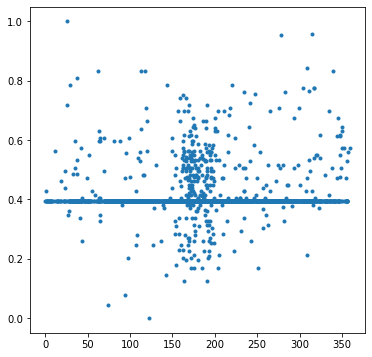

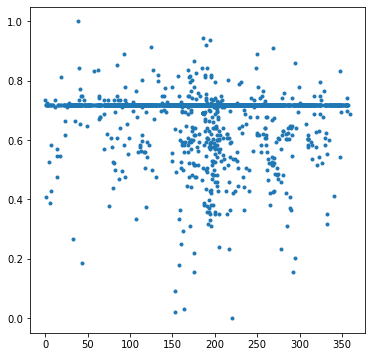

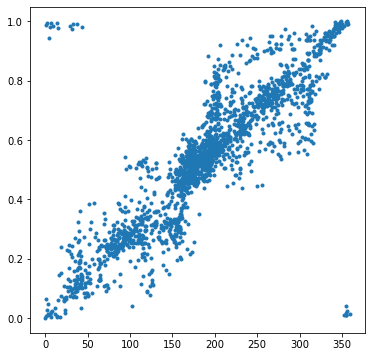

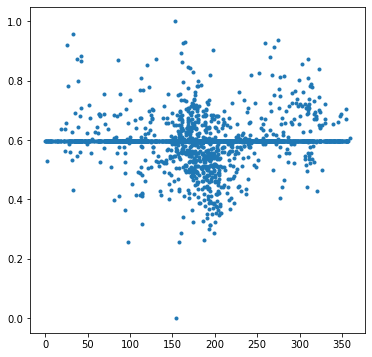

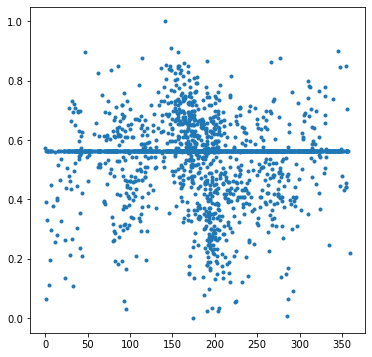

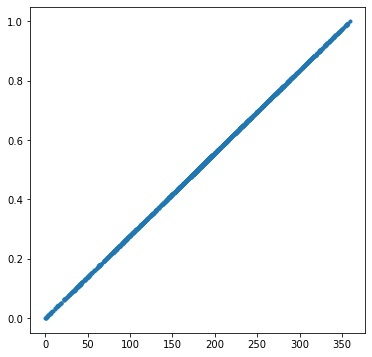

In [60]:
figures = []

for column in col:
    f = plt.figure(figsize=(6,6))
    figures += [f]  # This appends a figure f to the list of figures
    ax = plt.axes()
    ax.plot(y, X[column], marker = 'o', ls='', ms = 3.0)

In [61]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [62]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
clusters = np.unique(identified_clusters)
clusters

array([0, 1, 2])

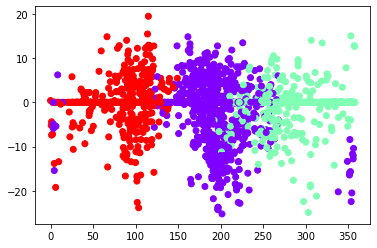

In [64]:
data_with_clusters = tracks_dataset.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['body_yaw'],data_with_clusters['head_pitch'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

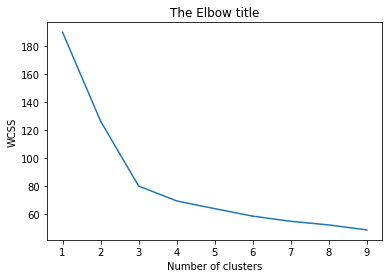

In [65]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X_train)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [66]:
np.round(kmeans.inertia_,4)

48.8225

In [67]:
np.round(kmeans.score(X_train),4)

-48.8225

In [68]:
kmeans.transform(X_train)

array([[0.19100536, 0.73961616, 0.36678312, ..., 0.38859744, 0.60674872,
        0.33947464],
       [0.27954378, 0.7094005 , 0.23562867, ..., 0.34074841, 0.43318064,
        0.32212549],
       [0.18877528, 0.80922239, 0.24502044, ..., 0.38622657, 0.49002619,
        0.28701781],
       ...,
       [0.15893597, 0.75585993, 0.27142665, ..., 0.37858215, 0.5251804 ,
        0.28702289],
       [0.17528718, 0.71383431, 0.27171927, ..., 0.33890658, 0.52739468,
        0.2625339 ],
       [0.17528718, 0.71383431, 0.27171927, ..., 0.33890658, 0.52739468,
        0.2625339 ]])

In [69]:
silhouette_samples(X_train, kmeans.labels_)

array([ 0.45008586, -0.09246924,  0.51243205, ...,  0.71067475,
        0.91300422,  0.91300422])

In [70]:
score = silhouette_score(X_train, kmeans.labels_)
np.round(score,4)

0.6302

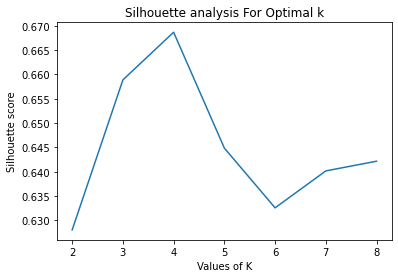

In [71]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X_train)
 cluster_labels = kmeans.labels_
 # silhouette score
 silhouette_avg.append(silhouette_score(X_train, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation) for k=4 we got the best silhouette score.